**Чирикова Полина, М8О-401Б-21**

**Импорт необходимых библиотек и базовая настройка**

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Настройки для графиков
sns.set(style="whitegrid")


**Для классификации используем датасет о качестве вина.
Для регрессии — датасет по недвижимости в Калифорнии.**

In [2]:
# Загрузка данных
wine_data = pd.read_csv("wine.csv", delimiter=";")
housing_data = pd.read_csv("california.csv")

# Просмотр данных
print("Данные по вину:")
print(wine_data.head())
print("\nДанные по жилью:")
print(housing_data.head())


Данные по вину:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2   

**Обработка wine_data**

In [8]:
from sklearn.impute import SimpleImputer

# Предобработка данных о вине
wine_data['quality'] = (wine_data['quality'] >= 6).astype(int)  # Бинаризация качества
X_wine = wine_data.drop('quality', axis=1)
y_wine = wine_data['quality']

# Разделение на обучающую и тестовую выборки
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

print("Размеры данных:")
print(f"Wine train: {X_wine_train.shape}, test: {X_wine_test.shape}")

# Обработка пропусков в данных о недвижимости
imputer = SimpleImputer(strategy="median")
X_housing_imputed = imputer.fit_transform(X_housing)

# Преобразование обратно в DataFrame
X_housing = pd.DataFrame(X_housing_imputed, columns=X_housing.columns)

# Разделение на обучающую и тестовую выборки
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

print("Обработка пропусков завершена. Размеры данных:")
print(f"Housing train: {X_housing_train.shape}, test: {X_housing_test.shape}")


Размеры данных:
Wine train: (1279, 11), test: (320, 11)
Обработка пропусков завершена. Размеры данных:
Housing train: (16512, 12), test: (4128, 12)


**В данных о вине целевая переменная бинаризована: качественное вино (>=6) и некачественное.
В данных о недвижимости целевая переменная — медианная стоимость жилья. Категориальные переменные преобразуем в числовые.**


**Создание бейзлайн моделей (четвертая ячейка)**

In [9]:
# Модель классификации (вино)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_wine_train, y_wine_train)
y_wine_pred = knn_clf.predict(X_wine_test)

# Метрики классификации
print("Метрики классификации (вино):")
print(classification_report(y_wine_test, y_wine_pred))

# Модель регрессии (недвижимость)
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_housing_train, y_housing_train)
y_housing_pred = knn_reg.predict(X_housing_test)

# Метрики регрессии
print("Метрики регрессии (недвижимость):")
print(f"MSE: {mean_squared_error(y_housing_test, y_housing_pred):.2f}")
print(f"R^2: {r2_score(y_housing_test, y_housing_pred):.2f}")



Метрики классификации (вино):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Метрики регрессии (недвижимость):
MSE: 11177084220.80
R^2: 0.15


**Построены бейзлайн модели с параметром n_neighbors=3.
Для классификации оцениваем classification_report.
Для регрессии используем mean_squared_error и r2_score.**

In [12]:
# Грид-сёрч для классификации
param_grid_clf = {'n_neighbors': range(1, 21)}
grid_clf = GridSearchCV(KNeighborsClassifier(), param_grid_clf, cv=5)
grid_clf.fit(X_wine_train, y_wine_train)
best_knn_clf = grid_clf.best_estimator_

print("Лучшая модель классификации (вино):", best_knn_clf)

param_grid_reg = {'n_neighbors': range(1, 21)}
grid_reg = GridSearchCV(KNeighborsRegressor(), param_grid_reg, cv=5)
grid_reg.fit(X_housing_train, y_housing_train)
best_knn_reg = grid_reg.best_estimator_

print("Лучшая модель регрессии (недвижимость):", best_knn_reg)


Лучшая модель классификации (вино): KNeighborsClassifier(n_neighbors=1)
Лучшая модель регрессии (недвижимость): KNeighborsRegressor(n_neighbors=20)


**С помощью GridSearchCV подбираем оптимальный параметр n_neighbors для обоих моделей.
Используем 5-кратную кросс-валидацию.**



**Оценка улучшенных моделей**

In [11]:
# Улучшенная модель классификации (вино)
y_wine_best_pred = best_knn_clf.predict(X_wine_test)
print("Метрики улучшенной классификации (вино):")
print(classification_report(y_wine_test, y_wine_best_pred))

# Улучшенная модель регрессии (недвижимость)
y_housing_best_pred = best_knn_reg.predict(X_housing_test)
print("Метрики улучшенной регрессии (недвижимость):")
print(f"MSE: {mean_squared_error(y_housing_test, y_housing_best_pred):.2f}")
print(f"R^2: {r2_score(y_housing_test, y_housing_best_pred):.2f}")


Метрики улучшенной классификации (вино):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Метрики улучшенной регрессии (недвижимость):
MSE: 9184838287.42
R^2: 0.30




**Визуализация**

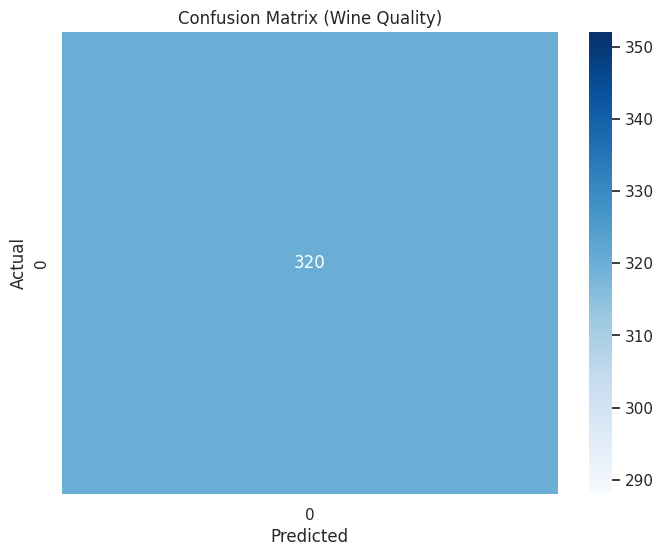

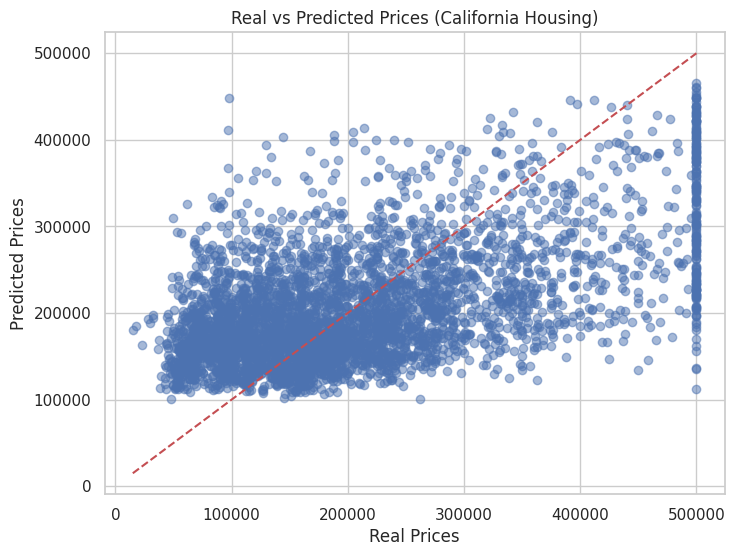

In [13]:
# Визуализация для классификации
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_wine_test, y_wine_best_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Wine Quality)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Визуализация для регрессии
plt.figure(figsize=(8, 6))
plt.scatter(y_housing_test, y_housing_best_pred, alpha=0.5)
plt.plot([y_housing_test.min(), y_housing_test.max()], [y_housing_test.min(), y_housing_test.max()], 'r--')
plt.title("Real vs Predicted Prices (California Housing)")
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.show()


**Для классификации строим матрицу ошибок (confusion matrix).
Для регрессии показываем реальное и предсказанное значение в виде графика.**